In [3]:
!pip install yfinance

In [3]:
import yfinance as yf

In [4]:
#GOOGL company :
#yyyy-mm-dd formate of date
#to load GOOGL  stock from 27-jan-2019 to 11-feb-2020
df=yf.download('GOOGL','2019-01-27','2020-02-11')

[*********************100%***********************]  1 of 1 completed


In [5]:
#To show first 5 records 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-28,54.503502,54.668499,53.730499,53.993000,53.993000,29334000
2019-01-29,54.051998,54.236500,53.300999,53.502998,53.502998,19704000
2019-01-30,53.868000,54.976002,53.832001,54.899502,54.899502,29452000
2019-01-31,55.612000,56.383499,55.262501,56.294498,56.294498,40232000
2019-02-01,56.114498,56.720001,55.712502,55.931000,55.931000,33116000


In [6]:
df.shape

(262, 6)

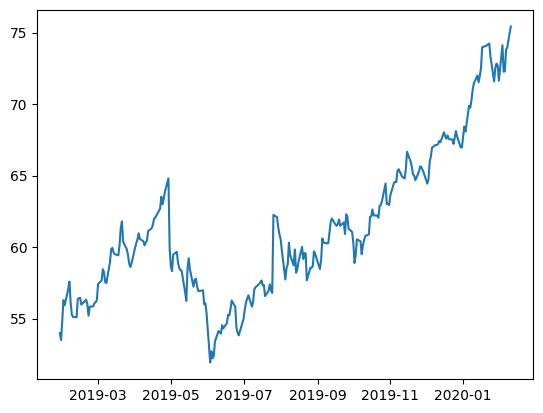

In [7]:
#plot Close means visualise the TS Data
import matplotlib.pyplot as plt
plt.plot (df['Close'])
plt.show()

In [10]:
#Without using visualisation , check whether the given time Time Series is Stationary or non-Stationary
#Deal Close Price of Share GOOGL(google)
df1=df[['Close']] #[[]] 2D mean DataFrame
df1.head()

,Close
Date,
2019-01-28,53.993000
2019-01-29,53.502998
2019-01-30,54.899502
2019-01-31,56.294498
2019-02-01,55.931000


In [11]:
df1.shape

(262, 1)

In [12]:
#To find the number of records
n=df1.shape[0] #or len()
print(n)

262


In [7]:
split=n//2 #Floor division , to return integer value
print(split) #Split user define variable

NameError: name 'n' is not defined

In [4]:
X1=df1[0:split] #first part Start=0 stop=split-1 step=+1
X2=df1[split: ] #second part Start=0 stop=split-1 step=+1

NameError: name 'df1' is not defined

In [6]:
X1.shape,X2.shape

NameError: name 'X1' is not defined

In [16]:
#Find the mean of both Series X1,X2
m1=X1.mean() #mean() inbuilt function
m2=X2.mean() 
print("Mean of first series",m1)
print("Mean of Second series",m2)

Mean of first series Close    57.735031
dtype: float64
Mean of Second series Close    64.72942
dtype: float64


In [17]:
#Find the Variance of both Series X1,X2
v1=X1.var() #var() inbuilt function
v2=X2.var() 
print("Variance of first series",v1)
print("Variance of Second series",v2)

Variance of first series Close    7.264382
dtype: float64
Variance of Second series Close    22.810865
dtype: float64


In [19]:
#To convert given time series dataframe non-stationary to stationary time
#serires using First method : diff() means First order Differencing
#First order differencing mean I(1) means formula : new series=Y(t)-Y(t-1)
df_diff1=df1.diff() #First order differencing
df_diff1.head()

,Close
Date,
2019-01-28,NaN
2019-01-29,-0.490002
2019-01-30,1.396503
2019-01-31,1.394997
2019-02-01,-0.363499


In [20]:
#Check after first order differencing whether new Ts_diff_1 is stationary
#or non-stationary , first remove null rows : use inbuilt function dropna()
df_diff1=df_diff1.dropna()
df_diff1.head()

,Close
Date,
2019-01-29,-0.490002
2019-01-30,1.396503
2019-01-31,1.394997
2019-02-01,-0.363499
2019-02-04,1.139999


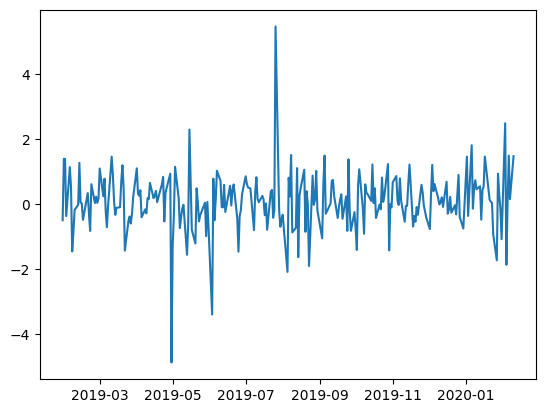

In [21]:
#plot new time series df_diff1
plt.plot(df_diff1)
plt.show()

In [22]:
#To find the number of records
n=df_diff1.shape[0] #or len()
print(n)
split=n//2 #Floor division , to return integer value
print(split) #Split user define variable
X1=df_diff1[0:split] #first part Start=0 stop=split-1 step=+1
X2=df_diff1[split: ] #second part Start=0 stop=split-1 step=+1
#Find the mean of both Series X1,X2
m1=X1.mean() #mean() inbuilt function
m2=X2.mean() 
print("Mean of first series",m1)
print("Mean of Second series",m2)
#Find the Variance of both Series X1,X2
v1=X1.var() #var() inbuilt function
v2=X2.var() 
print("Variance of first series",v1)
print("Variance of Second series",v2)

261
130
Mean of first series Close    0.044792
dtype: float64
Mean of Second series Close    0.119214
dtype: float64
Variance of first series Close    0.941584
dtype: float64
Variance of Second series Close    0.612558
dtype: float64


In [23]:
#After apply first differencing ,series is not a stationary
#Now apply second order difernecing , using shift() second method
#Y(t)-Y(t-2)
#df1['Close']-df['Close'].shift(2)
df_diff2=df1['Close']-df1['Close'].shift(2)#Second order differencing
df_diff2.head()

Date
2019-01-28         NaN
2019-01-29         NaN
2019-01-30    0.906502
2019-01-31    2.791500
2019-02-01    1.031498
Name: Close, dtype: float64

In [24]:
#drop null rows
df_diff2=df_diff2.dropna()
df_diff2.head()

Date
2019-01-30    0.906502
2019-01-31    2.791500
2019-02-01    1.031498
2019-02-04    0.776501
2019-02-05    1.662498
Name: Close, dtype: float64

In [25]:
#To find the number of records
n=df_diff2.shape[0] #or len()
print(n)

split=n//2 #Floor division , to return integer value
print(split) #Split user define variable

X1=df_diff2[0:split] #first part Start=0 stop=split-1 step=+1
X2=df_diff2[split: ] #second part Start=0 stop=split-1 step=+

#Find the mean of both Series X1,X2
m1=X1.mean() #mean() inbuilt function
m2=X2.mean() 
print("Mean of first series",m1)
print("Mean of Second series",m2)

#Find the Variance of both Series X1,X2
v1=X1.var() #var() inbuilt function
v2=X2.var() 
print("Variance of first series",v1)
print("Variance of Second series",v2)

260
130
Mean of first series 0.07736540574293871
Mean of Second series 0.24488457899827223
Variance of first series 2.1084172665761987
Variance of Second series 0.950440625421981


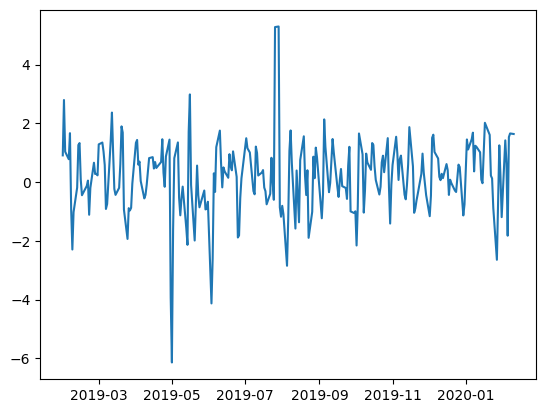

In [26]:
#plot new time series df_diff2
plt.plot(df_diff2)
plt.show()

In [28]:
#Use 3rd method: transformation 
#use log transformation to convertnon-stationary to stationary TS
#We have given TS dataset df1
df1.head()

,Close
Date,
2019-01-28,53.993000
2019-01-29,53.502998
2019-01-30,54.899502
2019-01-31,56.294498
2019-02-01,55.931000


In [29]:
import numpy as np
#Log() inbuilt function of numpy libery 
df_log=np.log(df1['Close'])
#df_log : is a new dataframe which hold the log of df1['Close]
df_log.head()

Date
2019-01-28    3.988854
2019-01-29    3.979738
2019-01-30    4.005504
2019-01-31    4.030597
2019-02-01    4.024119
Name: Close, dtype: float64

In [30]:
#Check whether the new TS df_log is stationary or non-stationary
#To find the number of records
n=df_log.shape[0] #or len()
print(n)

split=n//2 #Floor division , to return integer value
print(split) #Split user define variable

X1=df_log[0:split] #first part Start=0 stop=split-1 step=+1
X2=df_log[split: ] #second part Start=0 stop=split-1 step=+1

#Find the mean of both Series X1,X2
m1=round(X1.mean()) #mean() inbuilt function
m2=round(X2.mean()) 
print("Mean of first series",m1)
print("Mean of Second series",m2)

#Find the Variance of both Series X1,X2
v1=X1.var() #var() inbuilt function
v2=X2.var() 
print("Variance of first series",v1)
print("Variance of Second series",v2)

262
131
Mean of first series 4
Mean of Second series 4
Variance of first series 0.0021626578520790377
Variance of Second series 0.005286051957711319


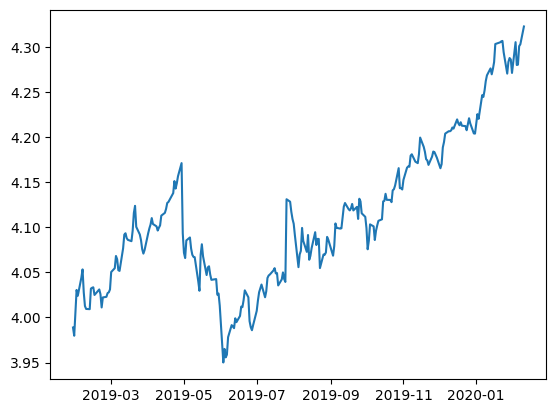

In [31]:
#plot new time series df_log
plt.plot(df_log)
plt.show()

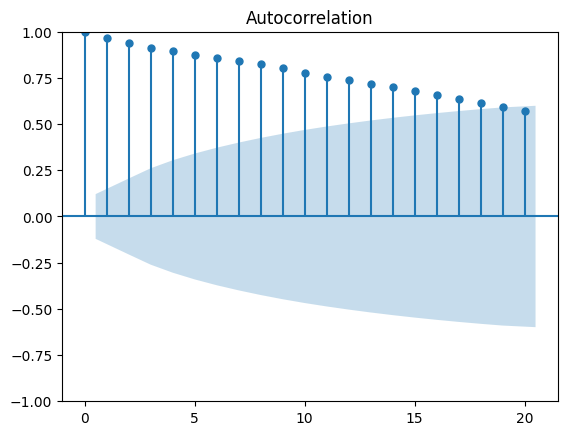

In [33]:
#Auto (Auto correlation function)
from statsmodels.graphics.tsaplots import plot_acf
#plot ACF plot
plot_acf (df1['Close'],lags=20)
plt.show()
#It also show stationary or non-stationary

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


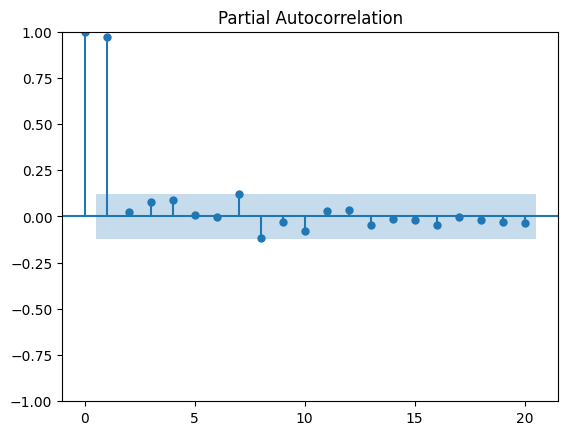

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
#plot PACF plot
plot_pacf (df1['Close'],lags=20)
plt.show()